In [1]:
import pandas as pd
from pandas import DataFrame
import os
import sys
import csv
from pathlib import Path
import seaborn as sns
sns.set()
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.show()
from collections import defaultdict
import os.path as op
import glob


os.chdir('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_images/')
images='/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_images/rRNA/'
matplotlib.__version__


'3.3.3'

rerun on 2021-12-07 after correcting for salinity of media samples

In [2]:
columns=['name', 'final_assembly_length', 'gc_content', 'estimated_diameter', 'Sample_collection_Date', 'gate',
         'GTDB_classification', 'checkM_estimated_completeness', 'total_CDS_count', 'hypothetical_cds_fraction',
         'Predicted_respiration_rate_fmol_O2perhr']

SAG_data=pd.read_csv('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/Summary_files/All_GoM_SAGs_1cell_20kb_decon_531normalized_predresp_rate_GTDBclass.csv', 
                     usecols=columns)
SAG_data

,name,final_assembly_length,gc_content,checkM_estimated_completeness,total_CDS_count,hypothetical_cds_fraction,estimated_diameter,Sample_collection_Date,gate,Predicted_respiration_rate_fmol_O2perhr,GTDB_classification
0,AH-135-A01,378833,29.810761,22.64,390.0,0.241026,0.31,170412,Respiring cells (RSG-positive),0.004610,Pelagibacter
1,AH-135-A02,1800737,36.025194,86.23,1622.0,0.332306,0.32,170412,Respiring cells (RSG-positive),0.063356,Hel1-33-131
2,AH-135-A03,856845,32.011857,74.13,919.0,0.228509,0.31,170412,Respiring cells (RSG-positive),0.004335,IMCC9063
3,AH-135-A04,1481697,36.515900,83.69,1467.0,0.194274,0.34,170412,Respiring cells (RSG-positive),0.019320,Thioglobus
4,AH-135-A05,382026,34.990812,19.18,400.0,0.275000,0.31,170412,Respiring cells (RSG-positive),0.007375,SCGC-AAA076-P13
...,...,...,...,...,...,...,...,...,...,...,...
5845,AH-273-P18,1350893,29.358432,67.28,1262.0,0.353407,0.41,171102,All prokaryotes (SYTO-9-positive),NaN,MAG-121220-bin8
5846,AH-273-P19,1073725,34.482293,55.29,1015.0,0.353695,0.34,171102,All prokaryotes (SYTO-9-positive),NaN,UBA3537
5847,AH-273-P20,1000803,29.565959,80.98,1045.0,0.222967,0.23,171102,All prokaryotes (SYTO-9-positive),NaN,Pelagibacter_A
5848,AH-273-P22,316565,29.359215,20.13,348.0,0.247126,0.25,171102,All prokaryotes (SYTO-9-positive),NaN,Pelagibacter


In [3]:
# this already has the growth rate from grodon added to it.
genus_stats=pd.read_csv('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/Summary_files/Genus_statistics.csv', index_col=0)
genus_stats=genus_stats.rename(columns={'GTDB_genus':'genus'})
genus_stats

,genus,full_GTDBtk_classification,#_of_cells,genus_size_rank,Domain,Phyla,Class,Order,Family,Genus,Species,Best_classification,Average_gc_content,Average_hypothetical_cds_fraction,median_estimated_diameter,mean_estimated_genome_length,Average_doubling_time,median_doubling_time
0,Unclassified,Unclassified,1790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unclassified,43.870487,0.561344,0.660,6.885372e+06,4.165118,3.478185
1,Pelagibacter,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,628,1.0,Bacteria,Proteobacteria,Alphaproteobacteria,Pelagibacterales,Pelagibacteraceae,Pelagibacter,NaN,Pelagibacter,29.846285,0.220466,0.300,1.464149e+06,8.115193,8.112808
2,SW10,d__Bacteria;p__Verrucomicrobiota;c__Verrucomic...,326,2.0,Bacteria,Verrucomicrobiota,Verrucomicrobiae,Verrucomicrobiales,Akkermansiaceae,SW10,NaN,SW10,50.074055,0.512254,0.895,4.920788e+06,4.386646,4.062906
3,SCGC-AAA076-P13,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,178,3.0,Bacteria,Proteobacteria,Gammaproteobacteria,SAR86,D2472,SCGC-AAA076-P13,NaN,SCGC-AAA076-P13,34.074901,0.248851,0.315,1.930576e+06,8.312164,8.593175
4,D2472,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,173,4.0,Bacteria,Proteobacteria,Gammaproteobacteria,SAR86,D2472,D2472,NaN,D2472,37.613462,0.239195,0.360,2.020084e+06,9.696105,9.841434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,UBA6669,d__Bacteria;p__Verrucomicrobiota;c__Verrucomic...,1,292.0,Bacteria,Verrucomicrobiota,Verrucomicrobiae,Opitutales,Opitutaceae,UBA6669,NaN,UBA6669,56.763571,0.430412,0.690,5.651669e+06,1.767563,1.767563
213,UBA721,d__Bacteria;p__Planctomycetota;c__Planctomycet...,1,294.0,Bacteria,Planctomycetota,Planctomycetes,Pirellulales,Pirellulaceae,UBA721,UBA721 sp002705165,UBA721,48.148855,0.462866,0.960,5.444938e+06,9.266202,9.266202
214,UBA7359,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,1,295.0,Bacteria,Proteobacteria,Gammaproteobacteria,UBA4486,UBA4486,UBA7359,NaN,UBA7359,37.587477,0.239183,0.590,2.259463e+06,11.276597,11.276597
215,UBA7446,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,1,296.0,Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales,Flavobacteriaceae,UBA7446,NaN,UBA7446,40.534629,0.323387,0.390,2.024038e+06,6.694833,6.694833


In [4]:
mRNA=pd.read_csv('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_analysis/O2_consumption/All_GoM_RNA_seq_transcripts_per_cell_by_genus_and_function_stacked_weighted_avg_O2_consumed_ALL_genes_all_Genus.csv')
mRNA
mRNA_pivot=mRNA.pivot_table(index=['genus', 'date'], values='transcripts_per_cell', aggfunc=np.sum)
mRNA_pivot=mRNA_pivot.rename(columns={'transcripts_per_cell':'mRNA_transcripts_per_cell'})
mRNA_pivot=mRNA_pivot.drop_duplicates()
mRNA_pivot

mRNA_transcripts_per_cell
genus           date                               
AAA164-E04      20171102                 219.970774
                20181030                  41.407165
                20190402                  71.256898
                20190709                  61.819633
AAA536-G10      20171102                 197.928423
...                                             ...
Winogradskyella 20190709                  16.120198
Yoonia          20171102                 196.343180
                20181030                  75.439063
                20190402                  34.390677
                20190709                  59.692345

[660 rows x 1 columns]

In [5]:
rRNA=pd.read_csv('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_analysis/rRNA_recruitment/16S_rRNA_copies_per_cell_per_Genus_melted.csv',
                 index_col=0)
rRNA=rRNA.rename(columns={'Genus':'genus'})
rRNA['date']=rRNA['date']+20000000
rRNA

,genus,date,16S_copies_per_cell
0,AAA164-E04,20190709,140.764254
1,AAA536-G10,20190709,876.260279
2,AG-337-I02,20190709,110.930849
3,AG-422-B15,20190709,98.039999
4,ASP10-02a,20190709,867.171322
...,...,...,...
443,UBA9320,20171102,242.523706
444,UBA952,20171102,433.627056
445,UBA9926,20171102,2430.373003
446,Unclassified,20171102,565.254946


In [6]:
O2=pd.read_csv('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_analysis/O2_consumption/Weighted_average_O2_consumption_per_cell_per_genus.csv',
              index_col=0)
O2=O2.drop_duplicates()
O2

,genus,Weighted_avg_O2_consumed_per_cell,date
0,AAA164-E04,0.002330,20171102
1,AAA536-G10,0.002330,20171102
2,AG-337-I02,0.002330,20171102
3,AG-414-E02,0.002330,20171102
4,AG-422-B15,0.002330,20171102
...,...,...,...
663,Verrucomicrobiales,0.001999,20190709
664,Vibrio,0.001999,20190709
665,Vicingaceae,0.001999,20190709
666,Winogradskyella,0.001999,20190709


In [7]:
genus_master=mRNA_pivot.merge(O2, on=['genus', 'date'], how='outer')
genus_master=genus_master.merge(rRNA, on=['genus', 'date'], how='outer')
genus_master=genus_master.merge(genus_stats, on='genus', how='left')

genus_master

,genus,date,mRNA_transcripts_per_cell,Weighted_avg_O2_consumed_per_cell,16S_copies_per_cell,full_GTDBtk_classification,#_of_cells,genus_size_rank,Domain,Phyla,...,Family,Genus,Species,Best_classification,Average_gc_content,Average_hypothetical_cds_fraction,median_estimated_diameter,mean_estimated_genome_length,Average_doubling_time,median_doubling_time
0,AAA164-E04,20171102,219.970774,0.002330,3515.741468,d__Bacteria;p__Verrucomicrobiota;c__Verrucomic...,37.0,25.0,Bacteria,Verrucomicrobiota,...,AAA164-E04,AAA164-E04,NaN,AAA164-E04,47.554405,0.485247,1.06,5.870149e+06,12.755643,12.456005
1,AAA164-E04,20181030,41.407165,0.002050,981.667559,d__Bacteria;p__Verrucomicrobiota;c__Verrucomic...,37.0,25.0,Bacteria,Verrucomicrobiota,...,AAA164-E04,AAA164-E04,NaN,AAA164-E04,47.554405,0.485247,1.06,5.870149e+06,12.755643,12.456005
2,AAA164-E04,20190402,71.256898,0.002101,39.275440,d__Bacteria;p__Verrucomicrobiota;c__Verrucomic...,37.0,25.0,Bacteria,Verrucomicrobiota,...,AAA164-E04,AAA164-E04,NaN,AAA164-E04,47.554405,0.485247,1.06,5.870149e+06,12.755643,12.456005
3,AAA164-E04,20190709,61.819633,0.001999,140.764254,d__Bacteria;p__Verrucomicrobiota;c__Verrucomic...,37.0,25.0,Bacteria,Verrucomicrobiota,...,AAA164-E04,AAA164-E04,NaN,AAA164-E04,47.554405,0.485247,1.06,5.870149e+06,12.755643,12.456005
4,AAA536-G10,20171102,197.928423,0.002330,1822.436862,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,48.0,17.0,Bacteria,Proteobacteria,...,AAA536-G10,AAA536-G10,NaN,AAA536-G10,31.655487,0.244558,0.55,2.697551e+06,10.508890,10.541393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,S36-B12,20171102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
744,UBA11663,20171102,NaN,NaN,NaN,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,2.0,164.0,Bacteria,Bacteroidota,...,UA16,UBA11663,NaN,UBA11663,57.200815,0.434652,0.49,3.251611e+06,2.306633,2.306633
745,UBA1515,20171102,NaN,NaN,NaN,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,2.0,165.0,Bacteria,Proteobacteria,...,UBA1515,UBA1515,NaN,UBA1515,40.424532,0.324600,0.32,1.200694e+06,8.999785,8.999785
746,UBA3478,20171102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
genus_master=genus_master.rename(columns={'Average_doubling_time':'Average_mininum_doubling_time'})
genus_master=genus_master.rename(columns={'median_doubling_time':'median_mininum_doubling_time'})
genus_master=genus_master.rename(columns={'median_estimated_diameter':'median estimated diameter'})

genus_master['log_weighted_avg_O2_consumed_per_cell']=np.log10(genus_master['Weighted_avg_O2_consumed_per_cell'])
genus_master['log_mRNA_transcripts_per_cell']=np.log10(genus_master['mRNA_transcripts_per_cell'])
genus_master['log_16S_copies_per_cell']=np.log10(genus_master['16S_copies_per_cell'])

# create a 16S/O2 factor and a mRNA/O2 ratio and then plot these against rhodopsin/ add rhodopsin as the size of the dots
genus_master['ratio16S_to_fmol_O2_consumed']=genus_master['16S_copies_per_cell']/genus_master['Weighted_avg_O2_consumed_per_cell']
genus_master['ratio_mRNA_to_fmol_O2_consumed']=genus_master['mRNA_transcripts_per_cell']/genus_master['Weighted_avg_O2_consumed_per_cell']

genus_master['log_ratio16S_to_fmol_O2_consumed']=np.log10(genus_master['ratio16S_to_fmol_O2_consumed'])
genus_master['log_ratio_mRNA_to_fmol_O2_consumed']=np.log10(genus_master['ratio_mRNA_to_fmol_O2_consumed'])


all_genera=genus_master[genus_master['log_mRNA_transcripts_per_cell']<= 4 ]
all_genera=all_genera[all_genera['median estimated diameter'] <=5]

# comment out this line to keep all weighted avg O2 values that are assigned to 1/2 the lowest detected value
# This value is barely above the arbitrary min values that were calculated in notebook 06
genus_master=genus_master[genus_master['Weighted_avg_O2_consumed_per_cell']>=0.0024]

# there is one mRNA outlier that is 2 orders of manitude higher. This is likely an artifact of low cell numbers and the below line gets rid of it
genus_master=genus_master[genus_master['log_mRNA_transcripts_per_cell']<= 4 ]

# remove 2017 timpeoints
genus_master_no2017=genus_master[genus_master['date']!= 20171102]
all_genera_no2017=all_genera[all_genera['date']!= 20171102]

genus_master


,genus,date,mRNA_transcripts_per_cell,Weighted_avg_O2_consumed_per_cell,16S_copies_per_cell,full_GTDBtk_classification,#_of_cells,genus_size_rank,Domain,Phyla,...,mean_estimated_genome_length,Average_mininum_doubling_time,median_mininum_doubling_time,log_weighted_avg_O2_consumed_per_cell,log_mRNA_transcripts_per_cell,log_16S_copies_per_cell,ratio16S_to_fmol_O2_consumed,ratio_mRNA_to_fmol_O2_consumed,log_ratio16S_to_fmol_O2_consumed,log_ratio_mRNA_to_fmol_O2_consumed
5,AAA536-G10,20181030,55.388667,0.003056,737.519266,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,48.0,17.0,Bacteria,Proteobacteria,...,2.697551e+06,10.508890,10.541393,-2.514852,1.743421,2.867773,241337.610024,18124.771990,5.382625,4.258273
6,AAA536-G10,20190402,96.361622,0.004028,1177.827026,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,48.0,17.0,Bacteria,Proteobacteria,...,2.697551e+06,10.508890,10.541393,-2.394952,1.983904,3.071082,292438.137957,23925.256046,5.466034,4.378857
9,AG-337-I02,20181030,55.112989,0.009284,523.029913,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,14.0,51.0,Bacteria,Proteobacteria,...,2.095484e+06,9.321011,9.504926,-2.032256,1.741254,2.718527,56335.599198,5936.225081,4.750783,3.773510
18,AG-422-B15,20190402,25.458490,0.003248,158.246223,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,14.0,52.0,Bacteria,Proteobacteria,...,1.519782e+06,11.051722,11.303084,-2.488340,1.405833,2.199333,48716.177104,7837.408595,4.687673,3.894172
22,ASP10-02a,20190402,76.948725,1.023917,1130.112708,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,18.0,36.0,Bacteria,Proteobacteria,...,3.164268e+06,4.469380,4.424221,0.010265,1.886201,3.053122,1103.715588,75.151360,3.042857,1.875937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,UBA9926,20190709,60.686329,0.005047,1221.920368,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,28.0,29.0,Bacteria,Proteobacteria,...,3.669067e+06,8.789250,8.780291,-2.296940,1.783091,3.087043,242093.446891,12023.502457,5.383983,4.080031
648,Unclassified,20171102,44.862255,23.337911,565.254946,Unclassified,1790.0,NaN,NaN,NaN,...,6.885372e+06,4.165118,3.478185,1.368062,1.651881,2.752244,24.220460,1.922291,1.384182,0.283819
649,Unclassified,20181030,11.930290,0.028693,164.728499,Unclassified,1790.0,NaN,NaN,NaN,...,6.885372e+06,4.165118,3.478185,-1.542223,1.076651,2.216769,5741.050227,415.789572,3.758991,2.618874
650,Unclassified,20190402,16.291330,0.439139,105.084254,Unclassified,1790.0,NaN,NaN,NaN,...,6.885372e+06,4.165118,3.478185,-0.357398,1.211957,2.021538,239.295943,37.098320,2.378935,1.569354


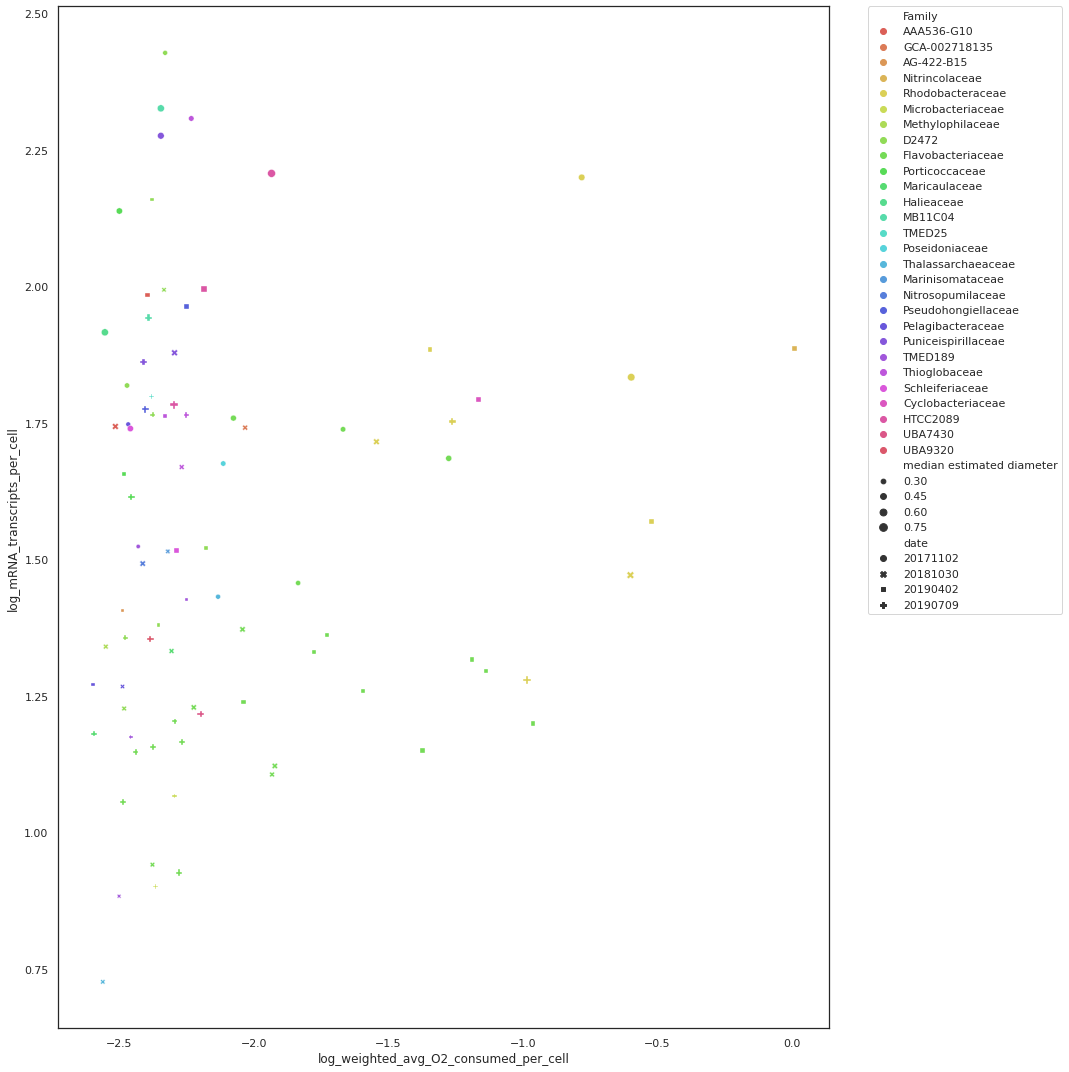

In [9]:
sns.set_style("white")
plt.figure(figsize=(15,15))
mRNA_O2_fig=sns.scatterplot(data=genus_master, x="log_weighted_avg_O2_consumed_per_cell", 
                            y='log_mRNA_transcripts_per_cell', style='date', hue='Family', palette='hls', size='median estimated diameter')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.savefig(images+"Log10_mRNA_weighted_avg_O2_consumed.pdf")

/mnt/scgc/scgc_nfs/opt/common/anaconda3a/envs/jacob_env/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]
/mnt/scgc/scgc_nfs/opt/common/anaconda3a/envs/jacob_env/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


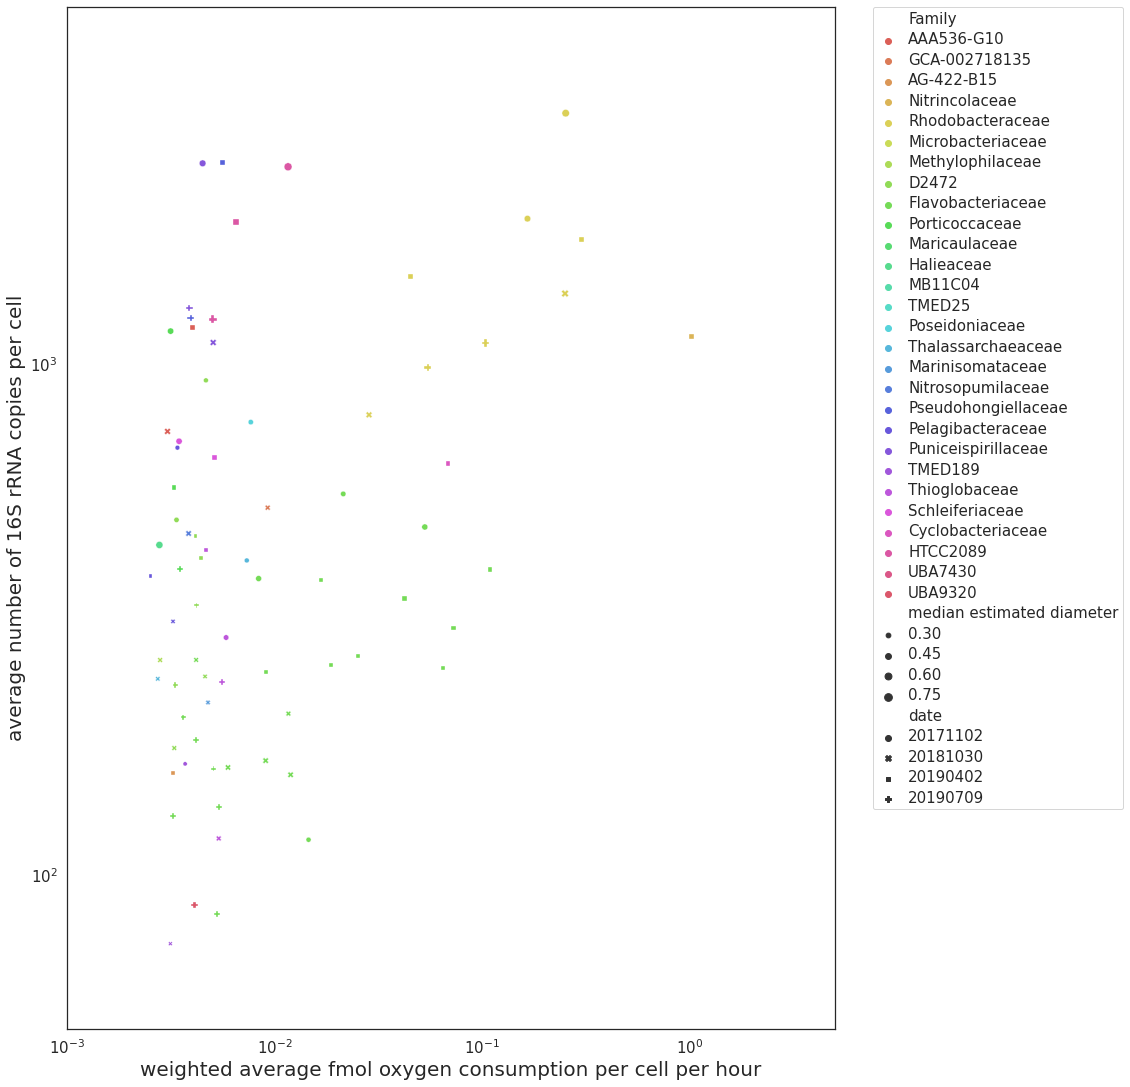

In [10]:
plt.figure(figsize=(15,15))

cellsize=genus_master['median estimated diameter'].to_numpy()
cellnorm=[100*s for s in cellsize]
rRNA=sns.scatterplot(data=genus_master, x="Weighted_avg_O2_consumed_per_cell", 
                     y='16S_copies_per_cell', style='date', hue='Family', palette='hls', 
                     size='median estimated diameter', size_order=cellnorm)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.xlabel('weighted average fmol oxygen consumption per cell per hour', fontsize=20)
plt.ylabel('average number of 16S rRNA copies per cell', fontsize=20)

rRNA.set_yticklabels(rRNA.get_yticks(), size = 15)
rRNA.set_xticklabels(rRNA.get_xticks(), size = 15)

plt.setp(rRNA.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(rRNA.get_legend().get_title(), fontsize='25') # for legend title

rRNA.set(yscale="log")
rRNA.set_xlim(left=0.001, right=5)
rRNA.set(xscale="log")
rRNA.set_ylim(bottom=50, top=5000)
plt.savefig(images+"Log10_rRNA_weighted_avg_O2_consumed.pdf")

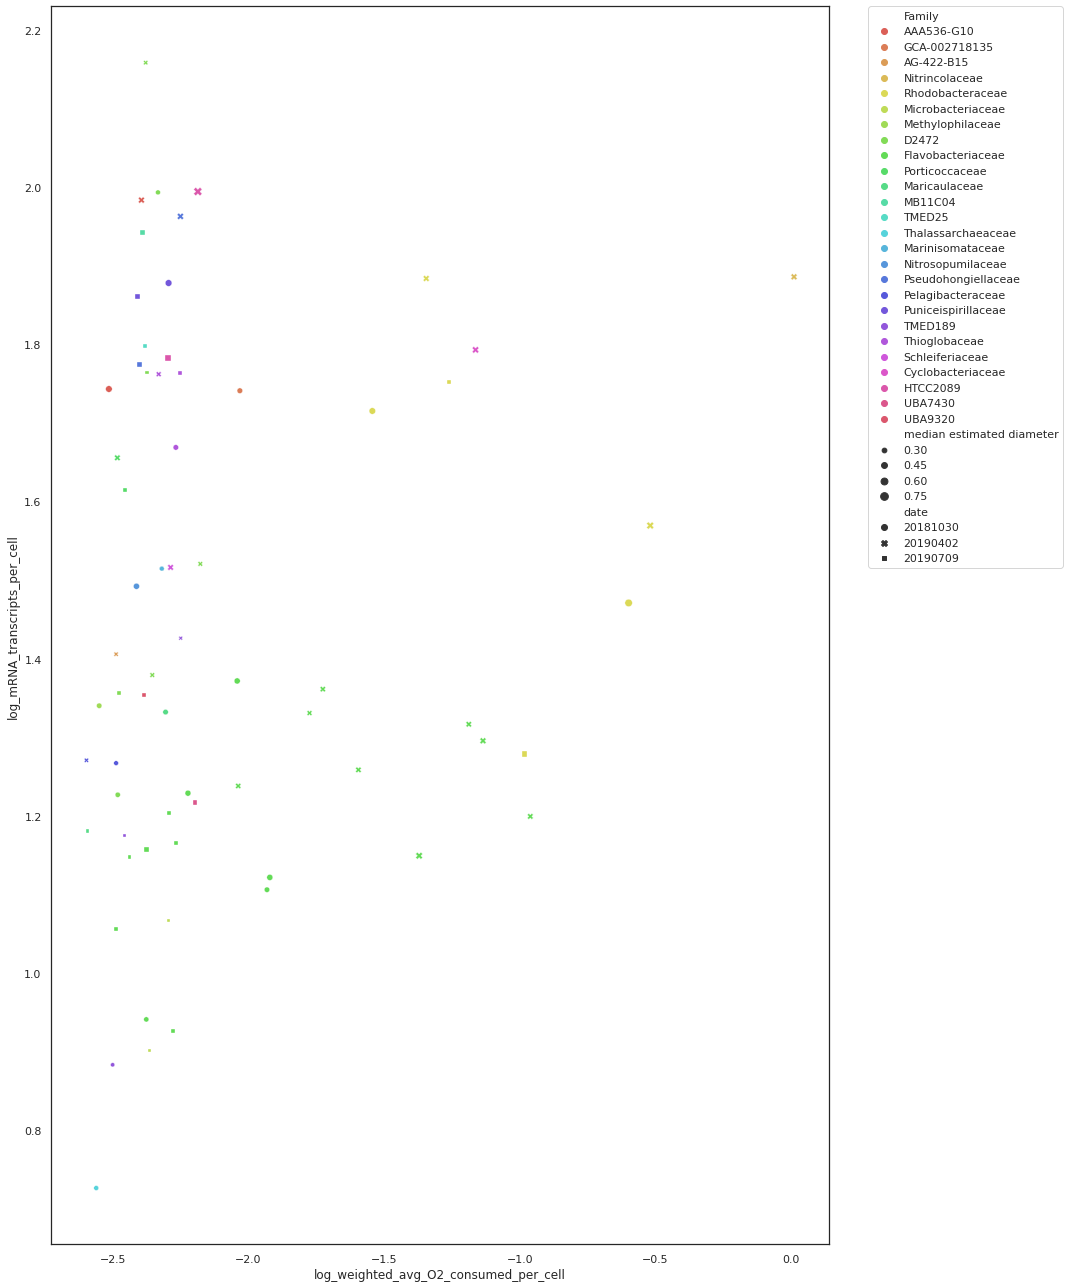

In [11]:
sns.set_style("white")
plt.figure(figsize=(15,18))
mRNA_O2_fig=sns.scatterplot(data=genus_master_no2017, x="log_weighted_avg_O2_consumed_per_cell", 
                            y='log_mRNA_transcripts_per_cell', style='date', hue='Family', palette='hls', size='median estimated diameter')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()

plt.savefig(images+"Log10_mRNA_weighted_avg_O2_consumed_NO2017.pdf")

/mnt/scgc/scgc_nfs/opt/common/anaconda3a/envs/jacob_env/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':
/mnt/scgc/scgc_nfs/opt/common/anaconda3a/envs/jacob_env/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]


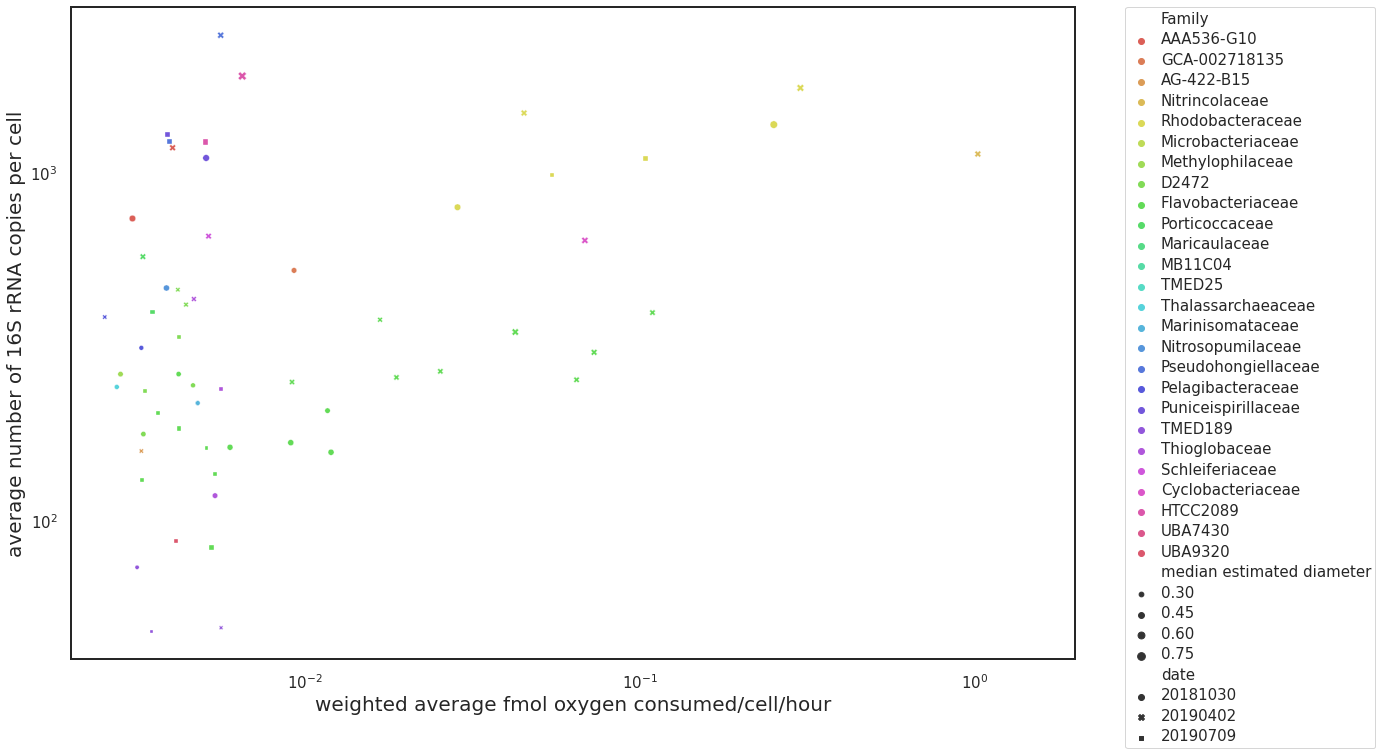

<Figure size 432x288 with 0 Axes>

In [12]:


plt.figure(figsize=(18,12))
plt.rcParams['axes.linewidth'] =2  

rRNA=sns.scatterplot(data=genus_master_no2017, x="Weighted_avg_O2_consumed_per_cell", 
                     y='16S_copies_per_cell', style='date', hue='Family', palette='hls', 
                     size='median estimated diameter', size_order=cellnorm)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xlabel('weighted average fmol oxygen consumed/cell/hour', fontsize=20)
plt.ylabel('average number of 16S rRNA copies per cell', fontsize=20)

rRNA.set_yticklabels(rRNA.get_yticks(), size = 15)
rRNA.set_xticklabels(rRNA.get_xticks(), size = 15)

plt.setp(rRNA.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(rRNA.get_legend().get_title(), fontsize='25') # for legend title

rRNA.set(yscale="log")
rRNA.set_xlim(left=0.002, right=2)
rRNA.set(xscale="log")
rRNA.set_ylim(bottom=40, top=3000)
plt.minorticks_on()
plt.tick_params(which='both', width=3)
plt.tick_params(which='major', length=10)
plt.tick_params(which='minor', length=5, color='k')


plt.show()
plt.tight_layout()
plt.savefig(images+"Log10_rRNA_weighted_avg_O2_consumed_NO2017.pdf")

genus_master_no2017.to_csv(images+'rRNA_O2_stats_no2017.csv')

No handles with labels found to put in legend.
/mnt/scgc/scgc_nfs/opt/common/anaconda3a/envs/jacob_env/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':
/mnt/scgc/scgc_nfs/opt/common/anaconda3a/envs/jacob_env/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]


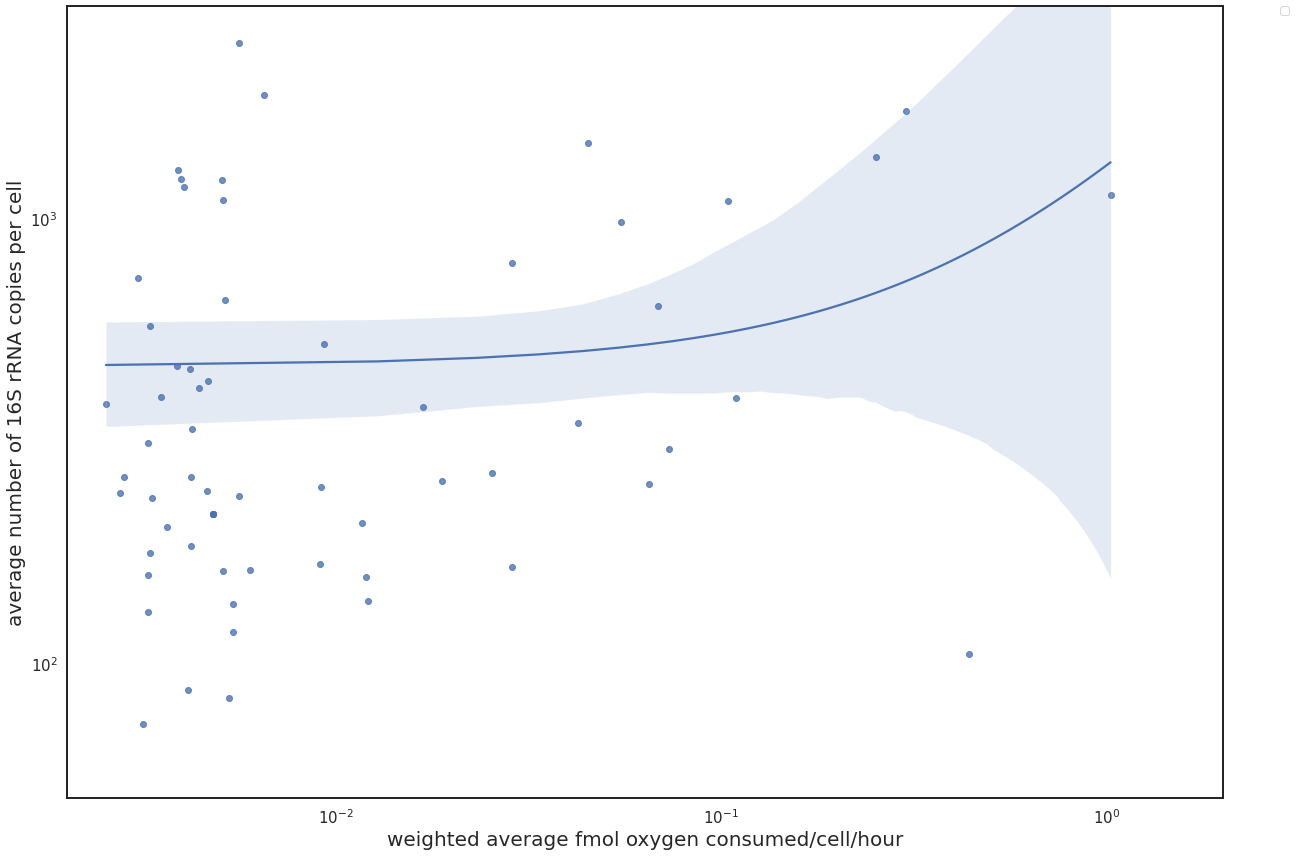

In [13]:

plt.figure(figsize=(18,12))

cellsize=genus_master['median estimated diameter'].to_numpy()
cellnorm=[100*s for s in cellsize]
rRNA=sns.regplot(data=genus_master_no2017, x="Weighted_avg_O2_consumed_per_cell", 
                     y='16S_copies_per_cell')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xlabel('weighted average fmol oxygen consumed/cell/hour', fontsize=20)
plt.ylabel('average number of 16S rRNA copies per cell', fontsize=20)

rRNA.set_yticklabels(rRNA.get_yticks(), size = 15)
rRNA.set_xticklabels(rRNA.get_xticks(), size = 15)

plt.setp(rRNA.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(rRNA.get_legend().get_title(), fontsize='25') # for legend title

rRNA.set(yscale="log")
rRNA.set_xlim(left=0.002, right=2)
rRNA.set(xscale="log")
rRNA.set_ylim(bottom=50, top=3000)
plt.minorticks_on()

plt.tight_layout()
plt.savefig(images+"Log10_rRNA_weighted_avg_O2_consumed_NO2017_regression.pdf")

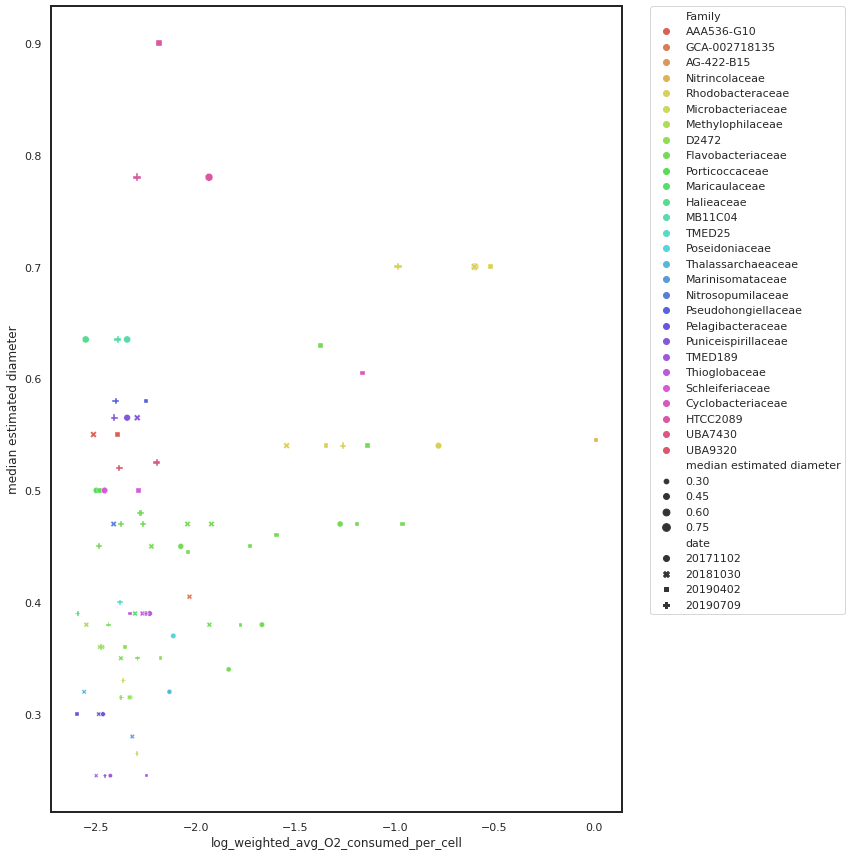

In [14]:
plt.figure(figsize=(12,12))
rRNA=sns.scatterplot(data=genus_master, x="log_weighted_avg_O2_consumed_per_cell", 
                     y='median estimated diameter', style='date', hue='Family', palette='hls', size='median estimated diameter')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()

plt.savefig(images+"median_diameter_weighted_avg_O2_consumed.pdf")

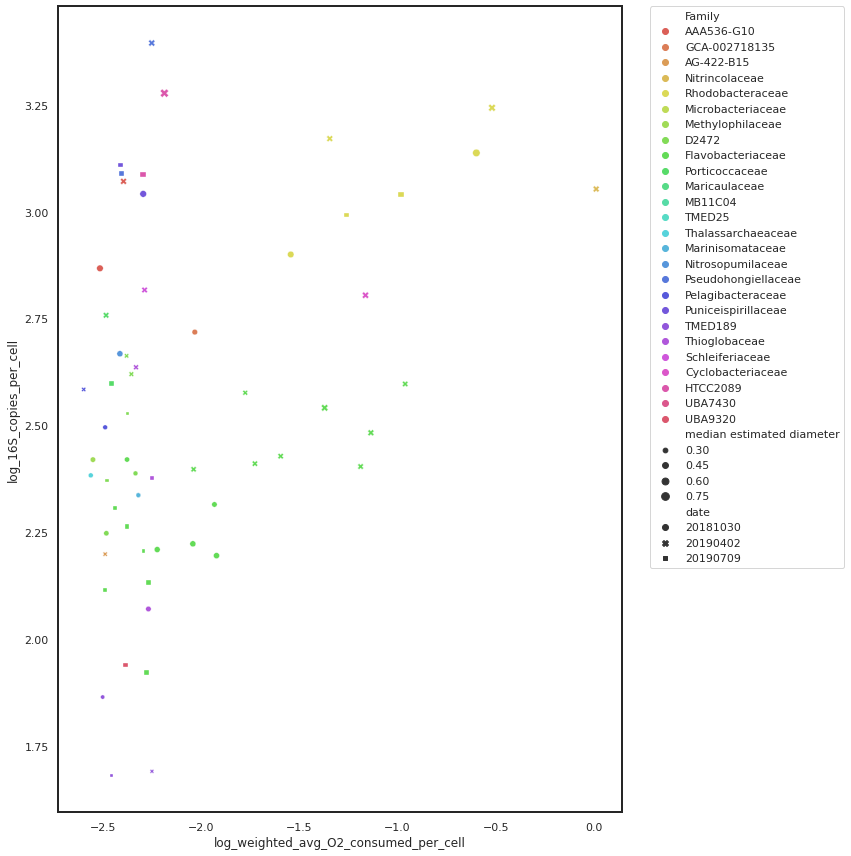

In [15]:
plt.figure(figsize=(12,12))
rRNAplt=sns.scatterplot(data=genus_master_no2017, x="log_weighted_avg_O2_consumed_per_cell", 
                     y='log_16S_copies_per_cell', style='date', hue='Family', palette='hls', size='median estimated diameter')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.savefig(images+"Log10_rRNA_weighted_avg_O2_consumed_median_diameter_NO2017.pdf")

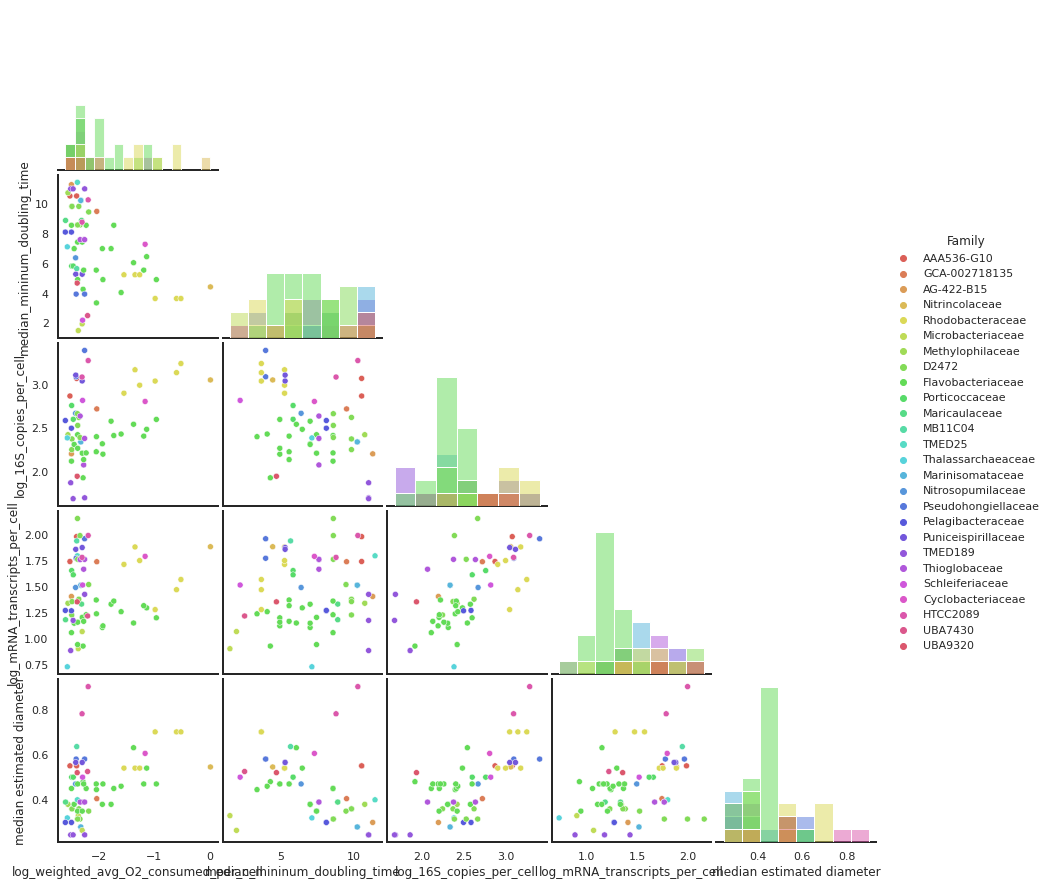

<Figure size 432x288 with 0 Axes>

In [16]:
#plt.figure(figsize=(12,12))
facet=sns.pairplot(data=genus_master_no2017, hue='Family', diag_kind="hist",
                  vars=['log_weighted_avg_O2_consumed_per_cell', 'median_mininum_doubling_time', 
                       'log_16S_copies_per_cell', 'log_mRNA_transcripts_per_cell', 'median estimated diameter'], 
                   palette='hls', corner=True)
plt.show()
#plt.tight_layout()
plt.savefig(images+"pairplot.pdf")

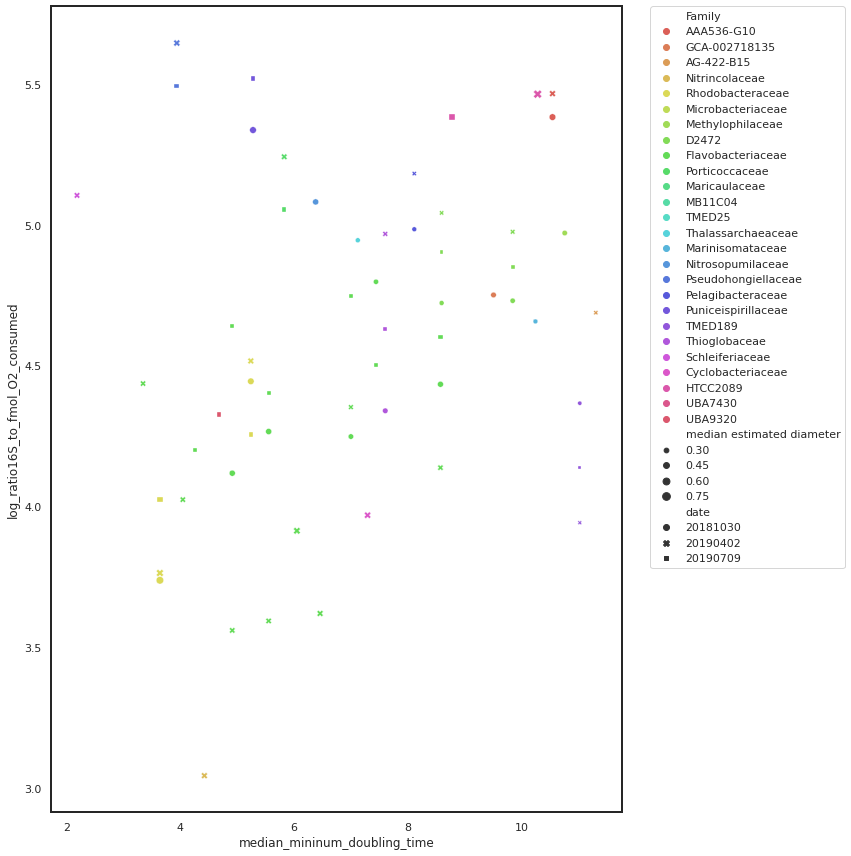

In [17]:
plt.figure(figsize=(12,12))
ratio=sns.scatterplot(data=genus_master_no2017, y="log_ratio16S_to_fmol_O2_consumed", 
                     x='median_mininum_doubling_time', style='date', hue='Family', palette='hls', size='median estimated diameter')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.savefig(images+"16S_O2ratio_doubling_time_NO2017.pdf")

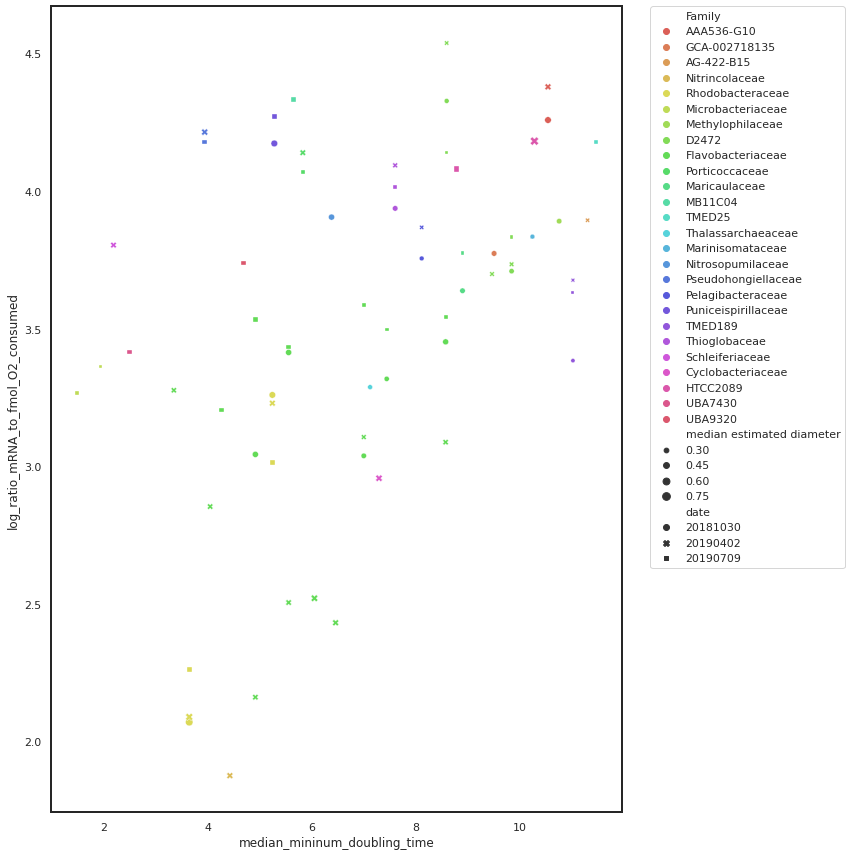

In [18]:
plt.figure(figsize=(12,12))
ratio=sns.scatterplot(data=genus_master_no2017, y="log_ratio_mRNA_to_fmol_O2_consumed", 
                     x='median_mininum_doubling_time', style='date', hue='Family', palette='hls', size='median estimated diameter')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.savefig(images+"mRNA_O2ratio_doubling_time_NO2017.pdf")

In [19]:
print(genus_master.columns)

Index(['genus', 'date', 'mRNA_transcripts_per_cell',
       'Weighted_avg_O2_consumed_per_cell', '16S_copies_per_cell',
       'full_GTDBtk_classification', '#_of_cells', 'genus_size_rank', 'Domain',
       'Phyla', 'Class', 'Order', 'Family', 'Genus', 'Species',
       'Best_classification', 'Average_gc_content',
       'Average_hypothetical_cds_fraction', 'median estimated diameter',
       'mean_estimated_genome_length', 'Average_mininum_doubling_time',
       'median_mininum_doubling_time', 'log_weighted_avg_O2_consumed_per_cell',
       'log_mRNA_transcripts_per_cell', 'log_16S_copies_per_cell',
       'ratio16S_to_fmol_O2_consumed', 'ratio_mRNA_to_fmol_O2_consumed',
       'log_ratio16S_to_fmol_O2_consumed',
       'log_ratio_mRNA_to_fmol_O2_consumed'],
      dtype='object')


In [20]:
transcripts=pd.read_csv('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_analysis/O2_consumption/Gene_transcripts_per_cell.csv')
transcripts

all_genera=all_genera.merge(transcripts, on=['genus', 'date'], how='left')
all_genera=all_genera[all_genera['genus'] != 'Unclassified']
all_genera.to_csv(images + 'rRNA_O2_transcripts_stats_all_genera.csv')

all_genera_no2017=all_genera_no2017.merge(transcripts, on=['genus', 'date'], how='left')
all_genera_no2017=all_genera_no2017[all_genera_no2017['genus'] != 'Unclassified']
all_genera_no2017.to_csv(images + 'rRNA_O2_transcripts_stats_all_genera_no2017.csv')


genus_master_no2017=genus_master_no2017.merge(transcripts, on=['genus', 'date'], how='left')
genus_master_no2017.to_csv(images+'/rRNA_O2_transcripts_stats_no2017.csv')
genus_master_no2017


,genus,date,mRNA_transcripts_per_cell,Weighted_avg_O2_consumed_per_cell,16S_copies_per_cell,full_GTDBtk_classification,#_of_cells,genus_size_rank,Domain,Phyla,...,log_16S_copies_per_cell,ratio16S_to_fmol_O2_consumed,ratio_mRNA_to_fmol_O2_consumed,log_ratio16S_to_fmol_O2_consumed,log_ratio_mRNA_to_fmol_O2_consumed,cytochrome_c_oxidase_transcripts_per_cell,nirA_transcripts_per_cell,cysH_transcripts_per_cell,bacteriochlorophyll_transcripts_per_cell,proteorhodopsin_transcripts_per_cell
0,AAA536-G10,20181030,55.388667,0.003056,737.519266,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,48.0,17.0,Bacteria,Proteobacteria,...,2.867773,241337.610024,18124.771990,5.382625,4.258273,NaN,NaN,NaN,NaN,0.339367
1,AAA536-G10,20190402,96.361622,0.004028,1177.827026,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,48.0,17.0,Bacteria,Proteobacteria,...,3.071082,292438.137957,23925.256046,5.466034,4.378857,NaN,NaN,NaN,NaN,1.697749
2,AG-337-I02,20181030,55.112989,0.009284,523.029913,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,14.0,51.0,Bacteria,Proteobacteria,...,2.718527,56335.599198,5936.225081,4.750783,3.773510,NaN,NaN,NaN,NaN,0.274058
3,AG-422-B15,20190402,25.458490,0.003248,158.246223,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,14.0,52.0,Bacteria,Proteobacteria,...,2.199333,48716.177104,7837.408595,4.687673,3.894172,NaN,NaN,NaN,NaN,0.340152
4,ASP10-02a,20190402,76.948725,1.023917,1130.112708,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,18.0,36.0,Bacteria,Proteobacteria,...,3.053122,1103.715588,75.151360,3.042857,1.875937,NaN,NaN,NaN,NaN,0.660194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,UBA9320,20190709,22.575790,0.004125,87.200558,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,18.0,40.0,Bacteria,Bacteroidota,...,1.940519,21141.731303,5473.488794,4.325141,3.738264,0.083680,NaN,NaN,NaN,0.143452
69,UBA9926,20190709,60.686329,0.005047,1221.920368,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,28.0,29.0,Bacteria,Proteobacteria,...,3.087043,242093.446891,12023.502457,5.383983,4.080031,NaN,NaN,NaN,NaN,0.335184
70,Unclassified,20181030,11.930290,0.028693,164.728499,Unclassified,1790.0,NaN,NaN,NaN,...,2.216769,5741.050227,415.789572,3.758991,2.618874,0.000694,NaN,0.000000,NaN,0.002429
71,Unclassified,20190402,16.291330,0.439139,105.084254,Unclassified,1790.0,NaN,NaN,NaN,...,2.021538,239.295943,37.098320,2.378935,1.569354,0.000000,NaN,0.000632,NaN,0.001264


In [21]:
all_genera

,genus,date,mRNA_transcripts_per_cell,Weighted_avg_O2_consumed_per_cell,16S_copies_per_cell,full_GTDBtk_classification,#_of_cells,genus_size_rank,Domain,Phyla,...,log_16S_copies_per_cell,ratio16S_to_fmol_O2_consumed,ratio_mRNA_to_fmol_O2_consumed,log_ratio16S_to_fmol_O2_consumed,log_ratio_mRNA_to_fmol_O2_consumed,cytochrome_c_oxidase_transcripts_per_cell,nirA_transcripts_per_cell,cysH_transcripts_per_cell,bacteriochlorophyll_transcripts_per_cell,proteorhodopsin_transcripts_per_cell
0,AAA164-E04,20171102,219.970774,0.002330,3515.741468,d__Bacteria;p__Verrucomicrobiota;c__Verrucomic...,37.0,25.0,Bacteria,Verrucomicrobiota,...,3.546017,1.508887e+06,94407.114742,6.178657,4.975005,0.000000,NaN,0.750753,NaN,NaN
1,AAA164-E04,20181030,41.407165,0.002050,981.667559,d__Bacteria;p__Verrucomicrobiota;c__Verrucomic...,37.0,25.0,Bacteria,Verrucomicrobiota,...,2.991964,4.789016e+05,20200.278863,5.680246,4.305357,0.140961,NaN,NaN,NaN,NaN
2,AAA164-E04,20190402,71.256898,0.002101,39.275440,d__Bacteria;p__Verrucomicrobiota;c__Verrucomic...,37.0,25.0,Bacteria,Verrucomicrobiota,...,1.594121,1.869675e+04,33921.259613,4.271766,4.530472,0.000000,NaN,NaN,NaN,NaN
3,AAA164-E04,20190709,61.819633,0.001999,140.764254,d__Bacteria;p__Verrucomicrobiota;c__Verrucomic...,37.0,25.0,Bacteria,Verrucomicrobiota,...,2.148492,7.042445e+04,30928.402106,4.847723,4.490357,0.000000,NaN,0.417700,NaN,NaN
4,AAA536-G10,20171102,197.928423,0.002330,1822.436862,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,48.0,17.0,Bacteria,Proteobacteria,...,3.260652,7.821539e+05,84946.972622,5.893292,4.929148,NaN,NaN,NaN,NaN,1.375089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Winogradskyella,20190709,16.120198,0.001999,15.518743,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,9.0,77.0,Bacteria,Bacteroidota,...,1.190857,7.764037e+03,8064.945379,3.890088,3.906601,0.000000,NaN,NaN,NaN,0.083524
610,Yoonia,20171102,196.343180,0.002330,NaN,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,6.0,97.0,Bacteria,Proteobacteria,...,NaN,NaN,84266.618008,NaN,4.925656,0.968799,NaN,NaN,NaN,NaN
611,Yoonia,20181030,75.439063,0.002050,NaN,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,6.0,97.0,Bacteria,Proteobacteria,...,NaN,NaN,36802.570525,NaN,4.565878,0.136665,NaN,NaN,NaN,NaN
612,Yoonia,20190402,34.390677,0.002101,NaN,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,6.0,97.0,Bacteria,Proteobacteria,...,NaN,NaN,16371.398654,NaN,4.214086,0.008009,NaN,NaN,NaN,NaN


In [22]:
hypo=pd.read_csv('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_analysis/GORG_recruitment/hypothetical_genes/RNA_read_distribution_to_hypothetical_genes.csv',
                index_col=0)

hypo


,genus,date,Hypothetical,Non_hypothetical,total,percent_reads_hypothetical
0,AAA164-E04,20171102,549.301307,258.259202,807.560509,68.019833
1,AAA164-E04,20181030,73.651893,49.371437,123.023330,59.868233
2,AAA164-E04,20190402,93.419477,98.188639,191.608116,48.755490
3,AAA164-E04,20190709,120.506514,80.407293,200.913807,59.979210
4,AAA536-G10,20171102,53.411363,214.996417,268.407780,19.899335
...,...,...,...,...,...,...
655,Winogradskyella,20190709,4.911231,19.210599,24.121830,20.360111
656,Yoonia,20171102,15.177845,207.322898,222.500742,6.821480
657,Yoonia,20181030,10.113208,74.072413,84.185621,12.012987
658,Yoonia,20190402,9.442620,35.704154,45.146774,20.915381


In [23]:
all_genera=pd.read_csv(images + 'rRNA_O2_transcripts_stats_all_genera.csv')
all_genera=all_genera.merge(hypo, on=['genus', 'date'])
all_genera.to_csv(images + 'rRNA_O2_transcripts_stats_all_genera.csv')


aboveO2=pd.read_csv(images+'/rRNA_O2_transcripts_stats_no2017.csv')
aboveO2=aboveO2.merge(hypo, on=['genus', 'date'])
aboveO2.to_csv(images+'/rRNA_O2_transcripts_stats_no2017.csv')

aboveO2

,Unnamed: 0,genus,date,mRNA_transcripts_per_cell,Weighted_avg_O2_consumed_per_cell,16S_copies_per_cell,full_GTDBtk_classification,#_of_cells,genus_size_rank,Domain,...,log_ratio_mRNA_to_fmol_O2_consumed,cytochrome_c_oxidase_transcripts_per_cell,nirA_transcripts_per_cell,cysH_transcripts_per_cell,bacteriochlorophyll_transcripts_per_cell,proteorhodopsin_transcripts_per_cell,Hypothetical,Non_hypothetical,total,percent_reads_hypothetical
0,0,AAA536-G10,20181030,55.388667,0.003056,737.519266,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,48.0,17.0,Bacteria,...,4.258273,NaN,NaN,NaN,NaN,0.339367,16.788679,59.980101,76.768780,21.869149
1,1,AAA536-G10,20190402,96.361622,0.004028,1177.827026,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,48.0,17.0,Bacteria,...,4.378857,NaN,NaN,NaN,NaN,1.697749,24.897915,105.188476,130.086391,19.139523
2,2,AG-337-I02,20181030,55.112989,0.009284,523.029913,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,14.0,51.0,Bacteria,...,3.773510,NaN,NaN,NaN,NaN,0.274058,12.435365,61.121703,73.557068,16.905738
3,3,AG-422-B15,20190402,25.458490,0.003248,158.246223,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,14.0,52.0,Bacteria,...,3.894172,NaN,NaN,NaN,NaN,0.340152,5.918645,26.562094,32.480740,18.222015
4,4,ASP10-02a,20190402,76.948725,1.023917,1130.112708,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,18.0,36.0,Bacteria,...,1.875937,NaN,NaN,NaN,NaN,0.660194,7.380764,83.658979,91.039744,8.107189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,68,UBA9320,20190709,22.575790,0.004125,87.200558,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,18.0,40.0,Bacteria,...,3.738264,0.083680,NaN,NaN,NaN,0.143452,5.176233,25.277473,30.453706,16.997056
69,69,UBA9926,20190709,60.686329,0.005047,1221.920368,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,28.0,29.0,Bacteria,...,4.080031,NaN,NaN,NaN,NaN,0.335184,13.545040,69.041997,82.587037,16.400928
70,70,Unclassified,20181030,11.930290,0.028693,164.728499,Unclassified,1790.0,NaN,NaN,...,2.618874,0.000694,NaN,0.000000,NaN,0.002429,661.551653,12.293318,673.844971,98.175646
71,71,Unclassified,20190402,16.291330,0.439139,105.084254,Unclassified,1790.0,NaN,NaN,...,1.569354,0.000000,NaN,0.000632,NaN,0.001264,1144.585575,16.671830,1161.257405,98.564329
